# Convolutional Neural Networks (CNN)

# CNN Nedir?

**Convolutional Neural Network (CNN)**, görüntü verilerini analiz etmek için tasarlanmış bir yapay sinir ağıdır. Görüntü sınıflandırma, nesne tanıma ve yüz tanıma gibi bilgisayarla görme görevlerinde yaygın olarak kullanılır.

## Temel Bileşenler

- **Konvolüsyon Katmanı**: Özellik haritaları çıkarmak için filtreler kullanır ve yerel özellikleri yakalar.
  
- **Aktivasyon Fonksiyonu**: Genellikle ReLU gibi doğrusal olmayan fonksiyonlar kullanılır, karmaşık ilişkilerin öğrenilmesine yardımcı olur.
  
- **Havuzlama Katmanı**: Özellik haritalarını küçülterek hesaplama yükünü azaltır. Max pooling en yaygın yöntemdir.
  
- **Tam Bağlantılı Katman**: Modelin son katmanı olup, genellikle sınıflandırma için kullanılır.

## Ne İşe Yarar?

- **Görüntü Sınıflandırma**: Nesneleri tanımlamak (örn. kedi ve köpek).
- **Nesne Tanıma**: Belirli nesneleri tanımlamak (örn. otomobil).
- **Yüz Tanıma**: İnsan yüzlerini analiz etmek.
- **Görüntü Segmentasyonu**: Görüntüdeki nesneleri belirlemek.
- **Oyun ve Robotik**: Görüntü ve video verilerini işleyerek çevreyi anlamak.

CNN'ler, bilgisayarla görme alanında önemli başarılar elde etmiştir ve birçok uygulamada kullanılmaktadır.
<font color='blue'>

    
<br>- Kaynaklar: 
- [Deep Learning Tutorial for Beginners](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
- [Artificial Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
- [Convolutional Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
- [Recurrent Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch)
- [Conclusion](#18)


<img src='https://miro.medium.com/v2/resize:fit:1000/0*OkquCwOE-UeaQ6BF.gif'>

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
## Veri Setinin Yüklenmesi
* Bu bölümde verileri yüklüyor ve görselleştiriyoruz.

In [70]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

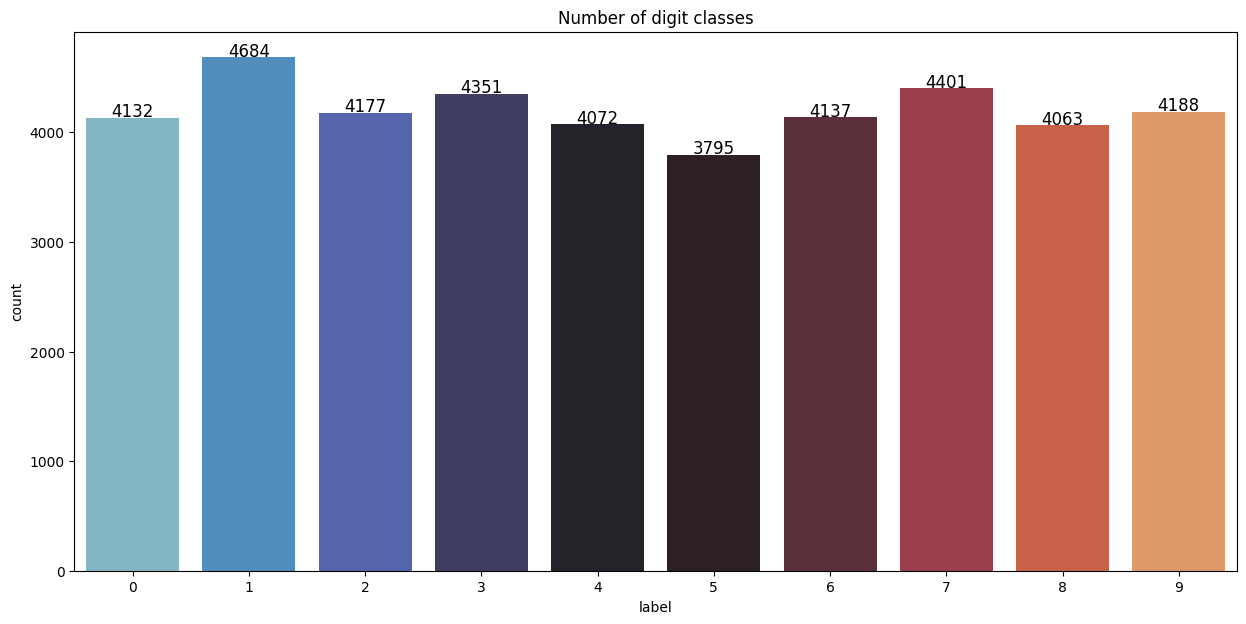

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [73]:
# Görüntülenen sınıfların sayısını görselleştir
plt.figure(figsize=(15,7))
g = sns.countplot(x=Y_train, palette="icefire")  # Y_train'i doğrudan kullanıyoruz
plt.title("Number of digit classes")

# Her çubuğun üzerine sayıları eklemek
for p in g.patches:
    g.annotate(f'{int(p.get_height())}', 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'baseline', 
               fontsize=12, color='black', 
               xytext = (0, 1), 
               textcoords = 'offset points')

plt.show()

# Her sınıfın sayısını göster
print(Y_train.value_counts())


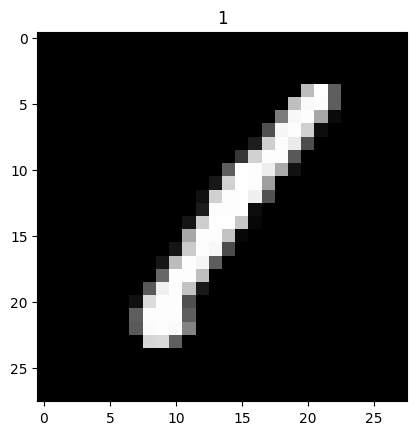

In [74]:
img = X_train.iloc[0].values  # veya img = X_train.iloc[0].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0])
plt.show()

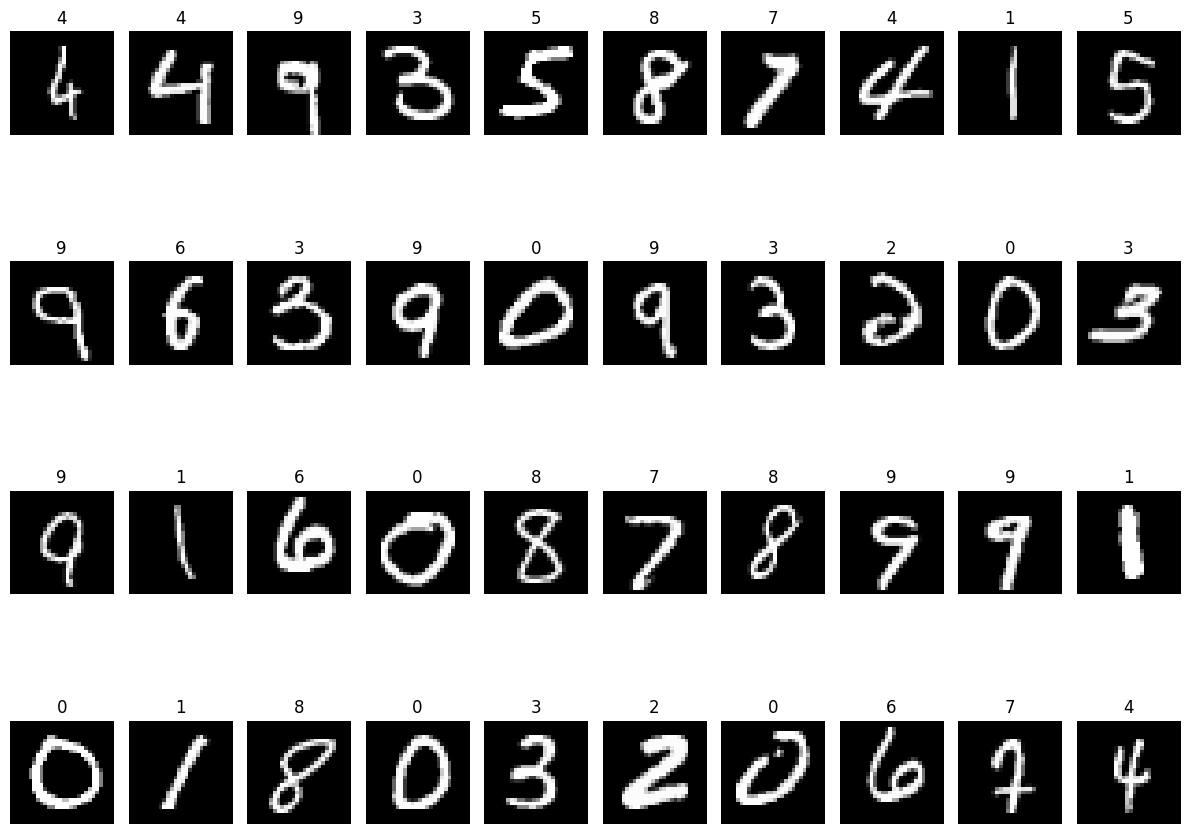

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Görüntü boyutunu ayarla

for group in range(10):
    random_indices = np.random.choice(X_train.index.unique(), size=4, replace=False)  # Her gruptan 4 rastgele örnek al

    for i, idx in enumerate(random_indices):
        img = X_train.loc[idx].values.reshape((28, 28))  # Resmi yeniden şekillendir
        plt.subplot(4, 10, i * 10 + group + 1)  # 4 satır, 10 sütun
        plt.imshow(img, cmap='gray')
        plt.title(train.iloc[idx, 0])  # Etiket başlığını ayarla
        plt.axis('off')  # Eksenleri kapat

plt.tight_layout()  # Alt subplotları düzenle
plt.show()

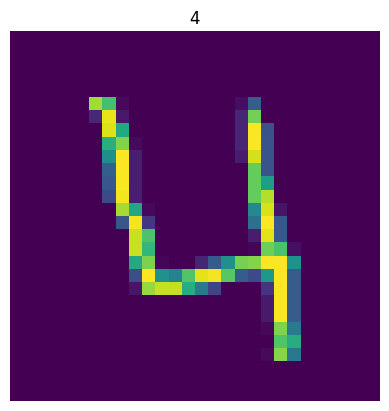

In [80]:
# X_train'den örnek veri alıp reshape işlemi yapıyoruz
img = X_train.iloc[3].values  # veya img = X_train.iloc[3].to_numpy()
img = img.reshape((28, 28))  # Eğer veriler 28x28 boyutundaysa

# Görüntüyü gösteriyoruz
plt.imshow(img)
plt.title(train.iloc[3, 0])
plt.axis("off")
plt.show()


## Normalleştirme, Yeniden Şekillendirme ve Etiket Kodlama 
* Normalleştirme
    * Aydınlatma farklılıklarının etkisini azaltmak için gri tonlamalı bir normalizasyon gerçekleştiriyoruz.
    * Normalizasyon yaparsak CNN daha hızlı çalışır.
* Yeniden şekillendir
    * Eğitim ve test görüntüleri (28 x 28) 
    * Tüm verileri 28x28x1 3D matrislere yeniden şekillendiriyoruz.
    * Keras'ın sonunda kanallara karşılık gelen ekstra bir boyuta ihtiyacı var. Görüntülerimiz gri ölçeklidir, bu nedenle yalnızca bir kanal kullanır. 
* Etiket Kodlama  
    * Etiketleri bir sıcak vektöre kodlayın 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [81]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [82]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [83]:
# Label Encoding 
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

# Eğer Y_train'de tam sayı etiketler varsa, to_categorical uygulanabilir
print("Y_train önce:", Y_train[:5])  # İlk 5 etiketi kontrol et

Y_train = to_categorical(Y_train, num_classes=10)  # 10 sınıf olduğundan num_classes=10
print("Y_train one-hot-encoding sonrası:", Y_train[:5])  # İlk 5 one-hot-encoded etiket

Y_train önce: 0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64
Y_train one-hot-encoding sonrası: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<a id="3"></a>
## Train Test Split  (verileri train ve test diye ayırma )
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [53]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


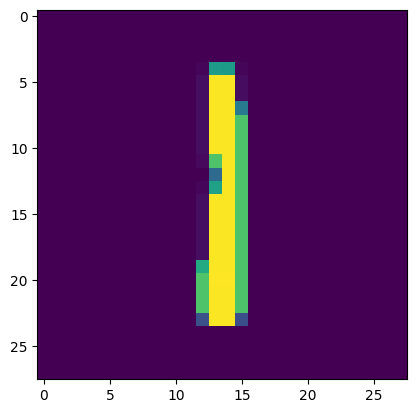

In [85]:
# Some examples
plt.imshow(X_train[2][:,:,0])
plt.show()

# CNN 

<a id="4"></a>
## Convolutional Neural Network 
* CNN görüntü sınıflandırma, nesne algılama için kullanılır 
<a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?

* Bir görüntümüz ve bir özellik dedektörü (3x3) var.
* Özellik dedektörü 3x3 matris olmak zorunda değildir. 5x5 veya 7x7 de olabilir.
* Özellik dedektörü = çekirdek (kernel) = filtre

* Özellik dedektörü, kenarlar veya çıkıntılı şekiller gibi özellikleri tespit eder. Örneğin, girdi bir köpekse, özellik dedektörü köpeğin kulağı veya kuyruğu gibi özellikleri tespit edebilir.
* Özellik haritası = conv(girdi görüntüsü, özellik dedektörü). Matrislerin eleman bazında çarpımı.
* Özellik haritası = konvolüsyonlu özellik
* Adım (Stride) = girdi görüntüsünde gezinme.
* Görüntünün boyutunu küçültüyoruz. Bu, kodun daha hızlı çalışması açısından önemlidir. Ancak, bilgi kaybı yaşarız.
* Birden fazla özellik haritası oluşturuyoruz çünkü birden fazla özellik dedektörü (filtre) kullanıyoruz.



* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>

* Konvolüsyon katmanından sonra, doğrusal olmayanlığı artırmak için ReLU kullanırız. Çünkü görüntüler doğrusal değildir.

<a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
###  Padding  'Same' (Aynı Dolgu )

* Konvolüsyon katmanlarını uygulamaya devam ettikçe, hacmin boyutu istediğimizden daha hızlı bir şekilde azalır. Ağımızın erken katmanlarında, düşük seviyedeki özellikleri çıkarmak için orijinal girdi hacmi hakkında mümkün olduğunca fazla bilgiyi korumak isteriz.

* same olunca girdi boyutu ve çıktı boyutu aynıdır.

<a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>
<img src='https://miro.medium.com/v2/resize:fit:1400/1*O06nY1U7zoP4vE5AZEnxKA.gif'>

<a id="7"></a>
### Max Pooling  (Maksimum Havuzlama)
* Aşağı örnekleme veya alt örnekleme yapar (Parametre sayısını azaltır).
* Özelliklerin ölçek veya yön değişikliklerine karşı değişmez olmasını sağlar.
* Ağda parametre ve hesaplama miktarını azaltır, dolayısıyla aşırı uyumu kontrol etmeye de yardımcı olur.

<a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<img src='https://miro.medium.com/v2/resize:fit:1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif'>

<a id="8"></a>
### Flattening  ( Düzleştirme)
* Flatting (Düzleştirme): Flattening, çok boyutlu bir veri yapısını (örneğin, bir görüntü matrisini) tek boyutlu bir vektöre dönüştürme işlemidir.

<a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Tam bağlı bir katmandaki nöronlar, önceki katmandaki tüm aktivasyonlara bağlantılara sahiptir.
* Yapay Sinir Ağı (Artificial Neural Network)



<a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model

* Conv2D:  CNN'de görüntüden özellikler çıkarmak için kullanılır. Görüntüdeki kenar ve şekil gibi öznitelikleri algılar.
<br>

* (Dropout) Bırakma: eğitim sırasında rastgele seçilen nöronların göz ardı edildiği bir tekniktir ('Overfiting' i önler)

<a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

### * conv => max pool => dropout => conv => max pool => dropout => fully connected (2 katman)


In [55]:
from sklearn.metrics import confusion_matrix
import itertools

# Keras'tan artık TensorFlow üzerinden import yapıyoruz
from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Gradient Descent
* **Tanım:** Gradient Descent, bir optimizasyon algoritmasıdır. Kayıp fonksiyonunun gradyanını (türevini) kullanarak, modelin ağırlıklarını güncelleyerek en düşük kayıp değerine ulaşmayı amaçlar.
* **Amaç:** Kayıp fonksiyonunu minimize etmek için ağırlıkları ayarlamak. Bu süreç, modelin öğrenmesi için gereken adımları belirler.
* **Çalışma Şekli:** Kayıp fonksiyonu üzerinden gradyanı hesaplar, ardından bu gradyanı kullanarak ağırlıkları günceller.
* **Kısaca:** Modelin daha iyi öğrenmesine yardımcı olur.

---

### Konu ile ilgili birkaç görsel

#### 1. Kayıp Fonksiyonu ve Gradyan İnişi
![Gradient Descent Visualization](https://i.pinimg.com/originals/6f/d6/22/6fd62253592b42795c48dc570a17579c.gif)
* **Açıklama:** Bu görselde, gradyan inişi algoritması ile kayıp fonksiyonunun en düşük noktasına nasıl ulaşıldığı gösterilmektedir. Her adımda kayıp değerinin azaldığını görebiliriz.

---

#### 2. Öğrenme Hızı ve Gradyan İnişi
![Learning Rate Visualization](https://jehyunlee.github.io/2020/03/28/Python-DL-3-1cycle-learning-rate-policy/lr_large-66286fcbf9e01fdecbd701e3203f2a3b.gif)
* **Açıklama:** Bu görselde, öğrenme hızının (learning rate) gradyan inişi üzerindeki etkisi gösterilmektedir. Yüksek öğrenme hızı, modelin kayıp fonksiyonunun minimumuna hızlıca ulaşmasını sağlayabilir, ancak aşırı yüksekse dengeyi bozabilir.

---

#### 3. Farklı İniş Yöntemleri
![Different Descent Methods](https://miro.medium.com/v2/resize:fit:1240/1*XVFmo9NxLnwDr3SxzKy-rA.gif)
* **Açıklama:** Bu görselde, gradyan inişinin farklı yöntemlerinin (tam gradyan, stokastik gradyan vb.) kayıp fonksiyonunun minimumuna ulaşmadaki hızları ve yolları gösterilmektedir. Hangi yöntemin kullanılacağı, verinin özelliklerine bağlı olarak değişebilir.

---

### Ek Notlar
- **Optimizatör Seçimi:** Seçilen optimizasyon algoritması, modelin performansını önemli ölçüde etkileyebilir.
- **Hiperparametre Ayarı:** Öğrenme oranı gibi hiperparametrelerin doğru ayarlanması, optimizasyon sürecinin başarısını artırır.
- **Uygulama:** Farklı optimizasyon yöntemlerinin etkilerini gözlemlemek, modelin öğrenme sürecinin daha iyi anlaşılmasına yardımcı olur.


# Aktivasyon Fonksiyonları ve İşlevleri

Aktivasyon fonksiyonları, bir ağ geçidi gibi davranarak hangi bilginin bir sonraki katmana iletilmesi gerektiğine karar verir. Bunları bir kulüpteki güvenlik görevlileri olarak düşünün; yalnızca belirli kişilerin (veya bu durumda verilerin) içeri girmesine izin verirler.

<img src='https://miro.medium.com/max/1200/1*HBvDu4Rl56AEz_jvF3BYBQ.gif' alt="Aktivasyon Fonksiyonları">

## 1. Sigmoid
- **Tanım**: Girdi değerlerini 0 ile 1 arasında sıkıştırarak olasılık tahminleri yapar.
- **Kullanım Alanı**: İkili sınıflandırma için uygundur.

## 2. Tanh (Hiperbolik Tanjant)
- **Tanım**: Girdi değerlerini -1 ile 1 arasında sıkıştırarak sıfır merkezli çıktılar sağlar.
- **Avantaj**: Öğrenmeyi hızlandırır.

## 3. ReLU (Rectified Linear Unit)
- **Tanım**: Negatif değerleri sıfıra çevirirken, pozitif değerleri olduğu gibi bırakır.
- **Avantaj**: Hesaplama açısından hızlıdır ve derin sinir ağlarında yaygın olarak kullanılır.

## 4. Leaky ReLU
- **Tanım**: Negatif değerler için küçük bir eğim sağlayarak Dying ReLU problemini aşar.
- **Avantaj**: Ölü nöronların öğrenmesini sürdürür.

## 5. Softmax
- **Tanım**: Çoklu sınıflandırma problemlerinde sınıflar arasında normalizasyon yaparak olasılık değerleri çıkarır.
- **Kullanım Alanı**: Çok sınıflı sınıflandırma problemlerinde kullanılır.


### * Note: 
* Gradient Descent: Bir optimizasyon tekniğidir.
* Optimizer: Farklı optimizasyon tekniklerini kapsayan genel bir terimdir.(aşağda olduğu gibi )
* *** - Dolayısıyla, "gradient descent" bir optimizasyon tekniğidir, ancak tüm optimizasyon algoritmalarını ifade etmez. Optimizer, gradient descent dahil olmak üzere çeşitli teknikleri içerir.

In [56]:
model = Sequential()  #  Kendi modelimiz oluşturmak için Kılıf 

# İlk Conv2D katmanı
model.add(Conv2D(filters=8,
                 kernel_size=(5, 5),
                 padding='Same', 
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2, 2))) # havuzlama 

model.add(Dropout(0.25))  #  Overfiting olmaması için bazı  Drop etme 

# İkinci Conv2D katmanı
model.add(Conv2D(filters=16,
                 kernel_size=(3, 3),
                 padding='Same', 
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Maksimum havuzlama işlemi. Görüntüdeki özellik haritasının boyutunu küçültmek için kullanılır. Bu işlem, modelin hesaplama maliyetini azaltır ve önemli özellikleri korurken gereksiz bilgileri atar.
model.add(Dropout(0.25))

# Tam bağlantılı (Fully Connected) katmanlar
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [57]:
from keras.optimizers import Adam

# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


<a id="12"></a>

# Kayıp Fonksiyonu (Loss Function)

* **Tanım:** Kayıp fonksiyonu, modelin tahminleri ile gerçek değerler arasındaki farkı ölçen bir fonksiyondur. Bu fonksiyon, modelin ne kadar iyi veya kötü performans gösterdiğini belirler.
* **Amaç:** Modelin öğrenme sürecinde hedef, bu kaybı minimize etmektir. Kayıp fonksiyonu, modelin çıktısını değerlendirmenin bir yoludur.
* **İşlev:** Modelin hatalarını gösterir ve modelin hangi yönlerde iyileştirilmesi gerektiğini anlamamıza yardımcı olur.
* **Örnekler:**
  - **Binary Cross-Entropy:** İkili sınıflandırma problemleri için kullanılır.
  - **Categorical Cross-Entropy:** Çoklu sınıflandırma problemleri için tercih edilir.
  - **Mean Squared Error (MSE):** Regresyon problemlerinde yaygın olarak kullanılır.

<img src='https://miro.medium.com/v2/resize:fit:1400/1*56ca0zyxjOl7gwIsR_5XwA.png'>

### Compile Model (Modeli Derleme)

* **Kategorik Çarpımsal Hata (Categorical Crossentropy)**: Çok sınıflı sınıflandırma problemleri için kullanılan bir kayıp fonksiyonudur. Modelin tahmin ettiği olasılık dağılımı ile gerçek etiketler arasındaki farkı ölçer. Bu sayede modelin hangi sınıfa ait olduğunu öğrenmesine yardımcı olur.

* **Neden Kullanıyoruz?**: Birden fazla sınıfın olduğu durumlarda modelin doğru tahmin yapabilmesi için kategorik çarpımsal hata kullanılır. Bu fonksiyon, modelin çıktısını değerlendirirken sınıflar arasındaki olasılık dağılımını optimize eder.

* **Görsel**: 

<a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [58]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
# accuracy yi classification da doğruluğu ölçmek için kullanıyoruz 

### Epochs ve Batch Size

- **Epoch (Eğitim Dönemi)**: Tüm eğitim verisinin model tarafından bir kez işlendiği süredir. Örneğin, 10 örneğiniz varsa, model tüm veriyi bir kez kullanır.
  
- **Batch Size (Partikül Boyutu)**: Modelin aynı anda işlediği verilerin sayısıdır. Örneğin, batch size 2 ise, model her seferinde 2 örneği işler.
  
- **Iterations (İterasyonlar)**: Bir epoch içindeki toplam batch sayısıdır. Örneğin, 10 örnek ve batch size 2 ise, 5 batch oluşur.

<img src='https://blog.kakaocdn.net/dn/BHLeA/btsaJVbaFdA/FguOrWNXcXRAerbeV63VU0/img.png'>


In [60]:
epochs = 10  # daha iyi sonuç almak için epokları artırabilirsiniz  
batch_size = 250

<a id="15"></a>
### Veri Artırma (Data Augmentation)

* **Aşırı Uydurma (Overfitting) Sorununu Önlemek**: El yazısı rakam veri setimizi yapay olarak genişletmemiz gerekiyor.
* **Küçük Dönüşümler ile Eğitim Verilerini Değiştirme**: Rakamın varyasyonlarını yeniden üretmek için eğitim verilerini küçük değişikliklerle değiştirmek.
* **Örnek Durumlar**: 
  - Rakam merkezde değil.
  - Ölçek aynı değil (büyük/küçük yazanlar).
  - Görüntü döndürülmüş.

* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>



In [61]:
# Veri artırma işlemi için ImageDataGenerator nesnesi oluşturma
datagen = ImageDataGenerator(
        featurewise_center=False,  # Tüm veri setinin ortalamasını 0'a ayarla
        samplewise_center=False,  # Her örneğin ortalamasını 0'a ayarla
        featurewise_std_normalization=False,  # Girdi verilerini veri setinin standart sapması ile böl
        samplewise_std_normalization=False,  # Her girdi verisini kendi standart sapması ile böl
        zca_whitening=False,  # Boyut indirgeme
        rotation_range=0.5,  # Resimleri rastgele 5 derece döndür
        zoom_range=0.5,  # Resimleri rastgele %5 oranında yakınlaştır
        width_shift_range=0.5,  # Resimleri yatayda rastgele %5 kaydır
        height_shift_range=0.5,  # Resimleri dikeyde rastgele %5 kaydır
        horizontal_flip=False,  # Resimleri yatayda rastgele çevir
        vertical_flip=False)  # Resimleri dikeyde rastgele çevir

# Eğitim verilerine veri artırma uygulama
datagen.fit(X_train)


<a id="16"></a>
## Fit the model  ( yani modeli eğitmek )

In [63]:
# Modeli eğitme
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.1461 - loss: 2.2430 - val_accuracy: 0.4169 - val_loss: 1.7299
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2440 - loss: 2.0116 - val_accuracy: 0.4412 - val_loss: 1.7123
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.3147 - loss: 1.9314 - val_accuracy: 0.7352 - val_loss: 1.0528
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4080 - loss: 1.7267 - val_accuracy: 0.7400 - val_loss: 1.0448
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.4078 - loss: 1.6984 - val_accuracy: 0.8281 - val_loss: 0.7032
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4280 - loss: 1.6212 - val_accuracy: 0.8200 - val_loss: 0.7137
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.4558 - loss: 1.5645 - val_accuracy: 0.8621 - val_loss: 0.5637
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4280 - loss: 1.6443 - val_accu

<a id="17"></a>
### Modeli değerlendirme ( Evulate Model )
* Test Kaybı görselleştirme  (test loss)
* Karışıklık matrisi  ( Confusion Matrix)


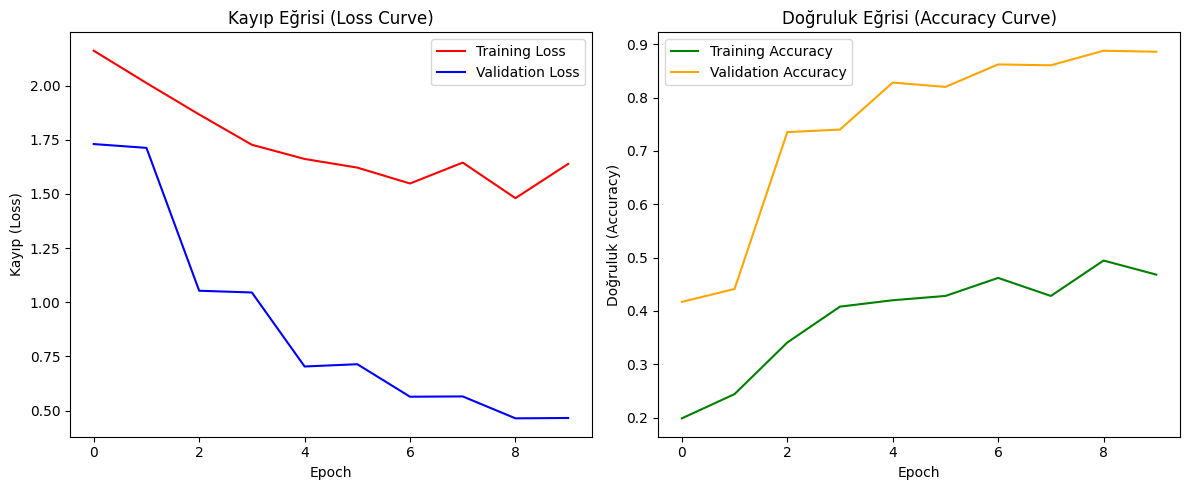

In [65]:
import matplotlib.pyplot as plt

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 5))

# Kayıp eğrisi
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
plt.plot(history.history['loss'], color='r', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title('Kayıp Eğrisi (Loss Curve)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()

# Doğruluk eğrisi
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
plt.plot(history.history['accuracy'], color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Doğruluk Eğrisi (Accuracy Curve)')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()

plt.tight_layout()  # Alt grafiklerin düzgün görünmesi için
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


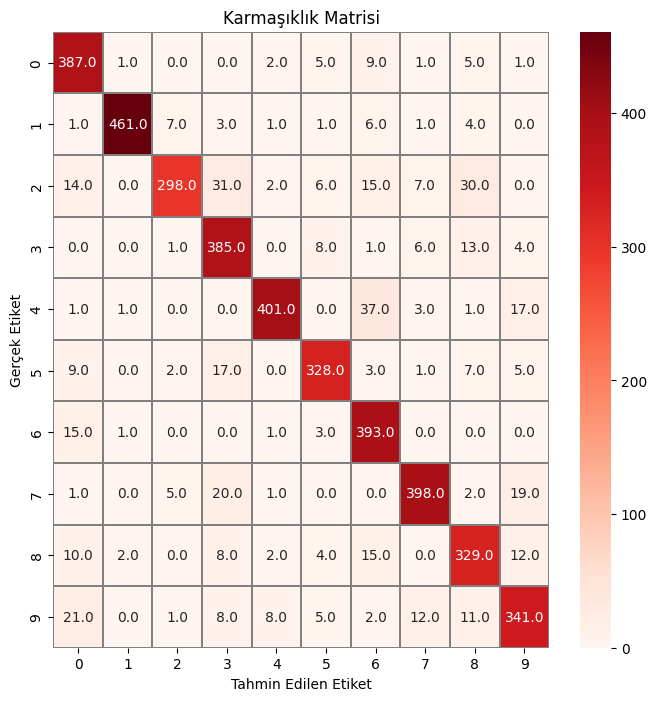

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Doğrulama seti ile tahminleri yap
Y_pred = model.predict(X_val)

# Tahmin sonuçlarını sınıf vektörlerine dönüştür
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Gerçek değerleri sınıf vektörlerine dönüştür
Y_true = np.argmax(Y_val, axis=1)

# Karmaşıklık matrisini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='.1f', cmap='Reds', linecolor='gray', linewidths=0.01)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')  # confusion matrix 
plt.show()

<a id="18"></a>
##  Result (Sonuç)Conclusion

* I hope this is all we could do, I hope you liked it, I look forward to your comments and suggestions :)

# Daha kısa ve basit şekilde 


In [86]:

# kütüphanleler :
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# MNIST veri setini yükle
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi normalleştir
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Veriyi yeniden şekillendir (28x28x1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Etiketleri one-hot formatına çevir
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [109]:
# Model Oluşturme 
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#derleme 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# öğretme (fit)
# Modeli eğit
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8453 - loss: 0.4920 - val_accuracy: 0.9793 - val_loss: 0.0638
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9707 - loss: 0.0908 - val_accuracy: 0.9854 - val_loss: 0.0439
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9786 - loss: 0.0642 - val_accuracy: 0.9900 - val_loss: 0.0297
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9834 - loss: 0.0527 - val_accuracy: 0.9910 - val_loss: 0.0279
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9861 - loss: 0.0428 - val_accuracy: 0.9908 - val_loss: 0.0310
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9877 - loss: 0.0365 - val_accuracy: 0.9906 - val_loss: 0.0282
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9914 - val_loss: 0.0247
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9899 - loss: 0.0297 - 

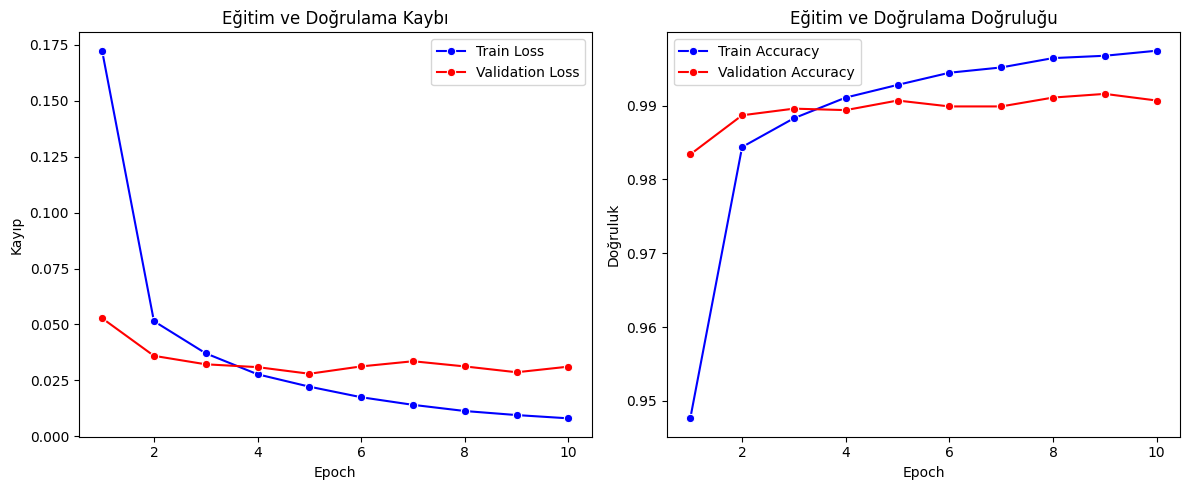

In [88]:
# Eğitim ve doğrulama kaybını çiz
plt.figure(figsize=(12, 5))

# Kaybı çiz
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, 11), y=history.history['loss'], label='Train Loss', color='blue', marker='o')
sns.lineplot(x=range(1, 11), y=history.history['val_loss'], label='Validation Loss', color='red', marker='o')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluğu çiz
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, 11), y=history.history['accuracy'], label='Train Accuracy', color='blue', marker='o')
sns.lineplot(x=range(1, 11), y=history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='o')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


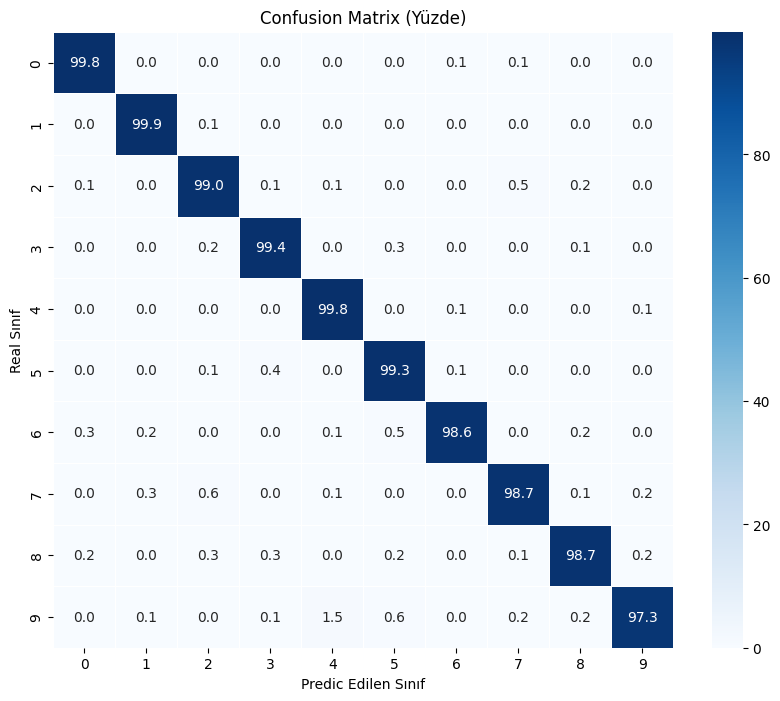

In [90]:
# Modelin test verisi üzerinde tahmin yapmasını sağla
Y_pred = model.predict(X_test)

# Tahmin edilen sınıfları almak için argmax kullan
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Gerçek sınıfları almak için argmax kullan
Y_true = np.argmax(y_test, axis=1)

# Karışıklık matrisini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Yüzdelik hesaplama
confusion_mtx_percentage = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

# Karışıklık matrisini yüzdelik olarak görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_percentage, annot=True, fmt='.1f', cmap='Blues', linewidths=0.5)
plt.xlabel("Predic Edilen Sınıf")
plt.ylabel("Real Sınıf")
plt.title("Confusion Matrix (Yüzde)")
plt.show()

## Extra 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen sınıf: 3 (x=199, y=68), Olasılık: 1.00


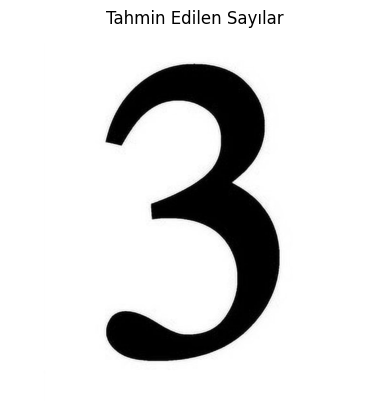

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2
import requests
from io import BytesIO

def predict_numbers_in_image(model, image_url):
    # URL'den görseli yükle
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('L')
    
    # Görseli NumPy dizisine çevir
    img_array = np.array(img)

    # Görseli ön işleme tabi tut
    _, img_thresh = cv2.threshold(img_array, 128, 255, cv2.THRESH_BINARY_INV)  # Tersine çevirme

    # Konturları bul
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Tahmin sonuçları için bir liste
    predictions = []

    # Her bir kontur için tahmin yap
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h >= 15:  # Yüksekliği kontrol et
            # Kontur alanını kes
            digit = img_thresh[y:y+h, x:x+w]
            digit_resized = cv2.resize(digit, (28, 28))  # Boyutlandır
            digit_resized = digit_resized.reshape((1, 28, 28, 1)) / 255.0  # Normalizasyon
            
            # Tahmin yap
            prediction = model.predict(digit_resized)
            predicted_class = np.argmax(prediction, axis=1)[0]
            predicted_prob = np.max(prediction)  # En yüksek olasılığı al
            
            # Tahminleri kaydet
            predictions.append((predicted_class, predicted_prob, (x, y, w, h)))  # Tahmin, olasılık ve konumu kaydet
            
            # Tahmin edilen sınıfı ve olasılığı yazdır
            print(f'Tahmin edilen sınıf: {predicted_class} (x={x}, y={y}), Olasılık: {predicted_prob:.2f}')  # Koordinatları ve olasılığı yazdır

    # Sonuçları çiz
    plt.imshow(img_array, cmap='gray')
    draw = ImageDraw.Draw(img)
    
    for pred, prob, (x, y, w, h) in predictions:
        # Kutuyu çiz
        draw.rectangle([x, y, x+w, y+h], outline='red', width=2)
        draw.text((x, y), f'{pred} ({prob:.2f})', fill='red')  # Tahmin edilen sayıyı ve olasılığı yaz

    plt.title("Tahmin Edilen Sayılar")
    plt.axis('off')
    plt.show()

# Örnek kullanım
image_url = 'https://i5.walmartimages.com/asr/94b17c6e-f14c-4fd8-a88f-5b3b8e22de11.88704ca94d91f93f5cc07fa053bc5b8a.jpeg?odnHeight=768&odnWidth=768&odnBg=FFFFFF'
predict_numbers_in_image(model, image_url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin edilen sınıf: 3 (x=54, y=28), Olasılık: 1.00


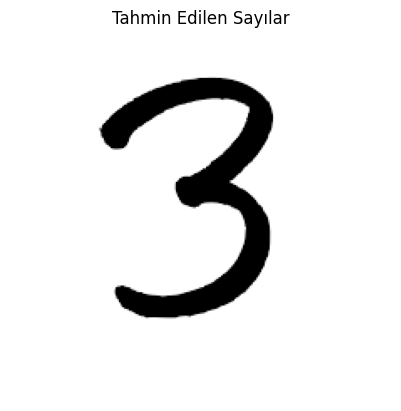

In [108]:
predict_numbers_in_image(model,'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzTHbpObiKpD53KTd0Hvx-EvoIxvUWnT5xls1scHaWsLf8A3h1AOm47ix9xwULTCKAVC4&usqp=CAU')